In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("loan_approvals_100.csv")
df.head()

,Age,Income,Credit Score,Loan Amount Requested,Loan Approved
0,25,200000,668,118724,No
1,46,200000,729,93682,Yes
2,24,200000,794,50000,Yes
3,40,200000,643,73672,Yes
4,44,200000,731,133680,Yes


In [4]:
df.shape

(100, 5)

In [5]:
df.describe()

,Age,Income,Credit Score,Loan Amount Requested
count,100.000000,100.0,100.000000,100.000000
mean,40.680000,200000.0,708.550000,75236.970000
std,12.773774,0.0,40.115081,41331.112538
min,21.000000,200000.0,618.000000,50000.000000
25%,29.000000,200000.0,683.750000,50000.000000
50%,40.000000,200000.0,708.500000,57105.500000
75%,50.250000,200000.0,738.250000,83884.750000
max,64.000000,200000.0,803.000000,288828.000000


In [6]:
df.isnull().sum()

Age                      0
Income                   0
Credit Score             0
Loan Amount Requested    0
Loan Approved            0
dtype: int64

In [9]:
df["Loan Approved"].value_counts()

Loan Approved
Yes    60
No     40
Name: count, dtype: int64

In [12]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.drop("Loan Approved", axis=1)
y = df["Loan Approved"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RFC = RandomForestClassifier()

RFC.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
y_preds = RFC.predict(X_test)

print(f"Classification Report: {classification_report(y_preds,y_test)}")

Classification Report:               precision    recall  f1-score   support

          No       0.89      1.00      0.94         8
         Yes       1.00      0.92      0.96        12

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



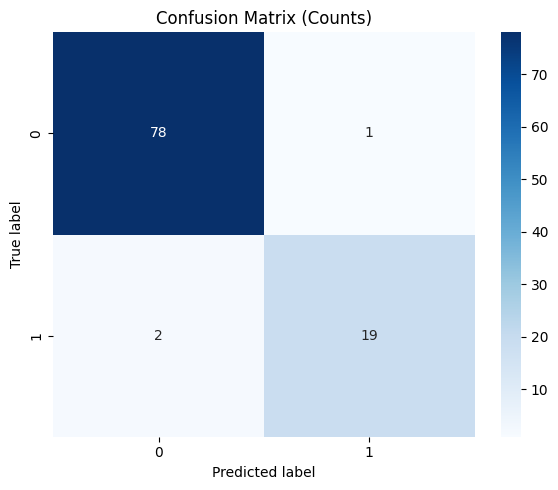

In [16]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_preds)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,         
    fmt="d",             
    cmap="Blues",        
    cbar=True
)
plt.title("Confusion Matrix (Counts)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()
